In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
%matplotlib inline

In [2]:
# Dataset >>> CIFAR-10
(xtrain, ytrain),(xtest, ytest) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape[1:]

(28, 28)

In [4]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]

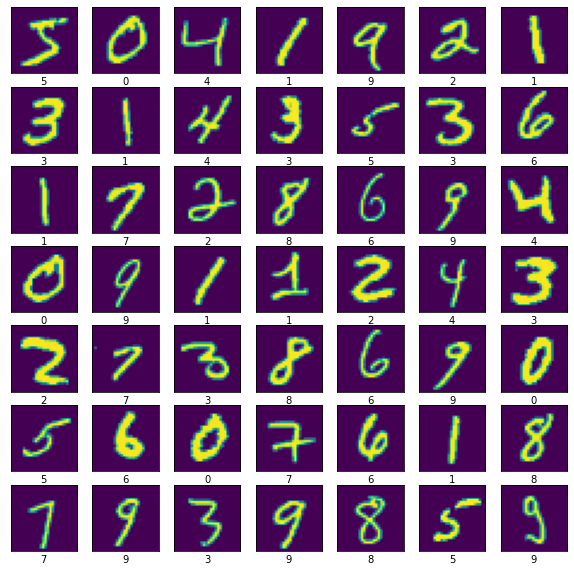

In [5]:
plt.figure(figsize=(10,10))
for i in range(49):
  plt.subplot(7, 7, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i])
  plt.xlabel(classes[ytrain[i]])
plt.show()

In [6]:
x_train = xtrain.reshape(xtrain.shape[0], -1)/255
x_test = xtest.reshape(xtest.shape[0], -1)/255

In [7]:
m, nx = x_train.shape
nx,m

(784, 60000)

##Using Custom MLP Block

In [8]:
class net(keras.layers.Layer):
  def __init__(self, units = 128, input_dims = 128):
      super(net, self).__init__()
      self.w = self.add_weight(shape = (input_dims, units), initializer = 'random_normal', trainable = True)
      self.b = self.add_weight(shape = (units,), initializer = 'zeros', trainable = True)
  
  def call(self, input):
    return tf.matmul(input, self.w) + self.b


In [9]:
class MLP(keras.layers.Layer):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer1 = net(200, nx)
    self.layer2 = net(200, 200)
    self.layer3 = net(300, 200)
    self.layer4 = net(150, 300)
    self.layer5 = net(100, 150)
    self.layer6 = net(10, 100)

  def call(self, input):
    a1 = tf.nn.relu(self.layer1(input))
    a2 = tf.nn.relu(self.layer2(a1))
    a3 = tf.nn.relu(self.layer3(a2))
    a4 = tf.nn.relu(self.layer4(a3))
    a5 = tf.nn.relu(self.layer5(a4))
    z = tf.nn.softmax(self.layer6(a5))
    return z

In [10]:
inputs = tf.keras.Input(shape =(nx,))
mlp = MLP()
outputs = mlp(inputs)

In [11]:
model = keras.Model(inputs = inputs, outputs = outputs)

In [12]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

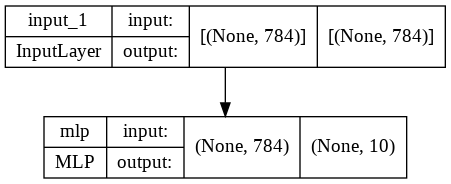

In [13]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 mlp (MLP)                   (None, 10)                318760    
                                                                 
Total params: 318,760
Trainable params: 318,760
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, ytrain, epochs=1)

1875/1875 [==============================] - 14s 5ms/step - loss: 0.2679 - accuracy: 0.9184


In [16]:
model.evaluate(x_test, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1357 - accuracy: 0.9597


[0.13573946058750153, 0.9596999883651733]

In [17]:
predict = model.predict(x_test)

In [18]:
yhat = [np.argmax(i) for i in predict]

<function matplotlib.pyplot.show>

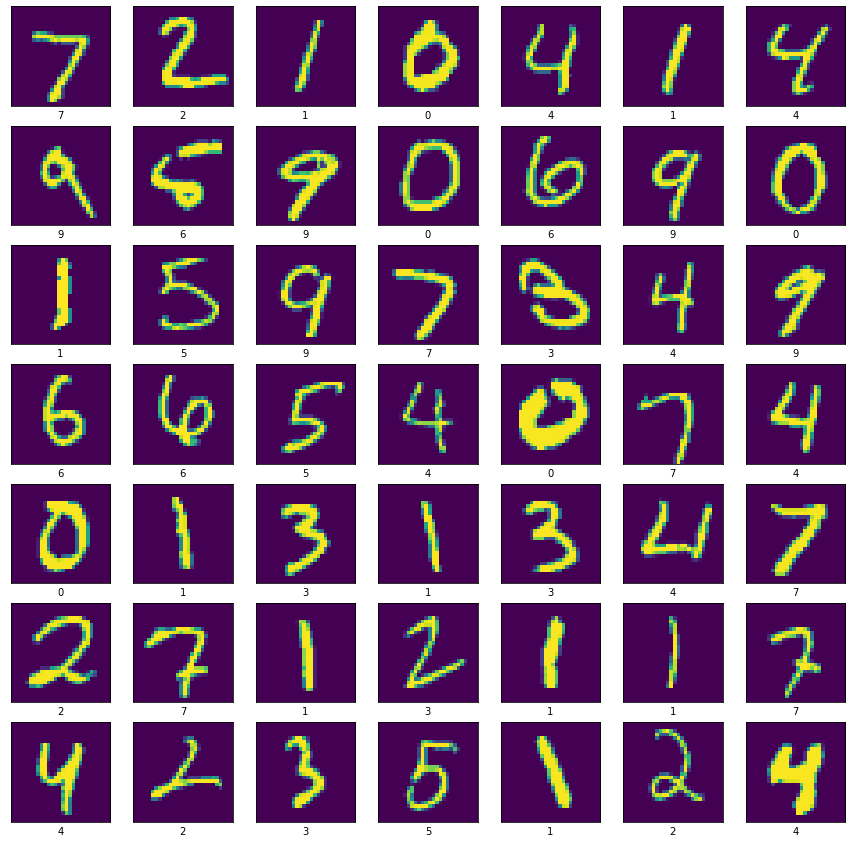

In [19]:
plt.figure(figsize=(15,15))
for i in range(49):
  plt.subplot(7,7,i+1)
  plt.imshow(xtest[i])
  plt.xlabel(classes[yhat[i]])
  plt.xticks([])
  plt.yticks([])
plt.show

In [20]:
cm = tf.math.confusion_matrix(labels= ytest, predictions=yhat)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    0,    0,    9,    0,    1,    1,    0],
       [   0, 1121,    3,    2,    0,    0,    2,    2,    5,    0],
       [  14,    2,  916,   32,   10,    0,    7,   14,   37,    0],
       [   1,    0,    1,  978,    0,    5,    0,    4,   14,    7],
       [   0,    0,    0,    0,  957,    0,    5,    1,    3,   16],
       [   2,    0,    0,   18,    2,  851,    7,    0,    6,    6],
       [  11,    3,    0,    0,    8,    9,  922,    0,    5,    0],
       [   1,    2,   10,    6,    5,    0,    0,  985,    4,   15],
       [   1,    2,    1,    6,    2,    8,    2,    3,  938,   11],
       [   4,    4,    0,    4,   19,    1,    0,   10,    7,  960]],
      dtype=int32)>

Text(0.5, 51.0, 'Prediction')

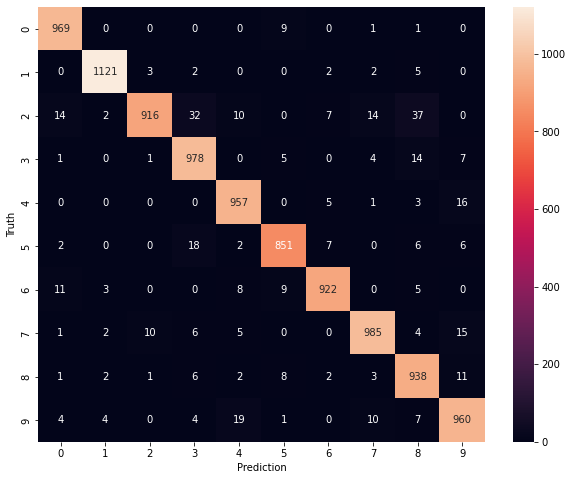

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Truth')
plt.xlabel('Prediction')


##Using Dense Layers

In [22]:
model2 = Sequential()
model2.add(Dense(300, activation = 'relu', input_shape = (nx,)))
model2.add(Dense(200, activation = 'relu'))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(250, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))

In [23]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 250)               25250     
                                                                 
 dense_4 (Dense)             (None, 10)                2510      
                                                                 
Total params: 343,560
Trainable params: 343,560
Non-trainable params: 0
_________________________________________________________________


In [24]:
model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics= 'accuracy')

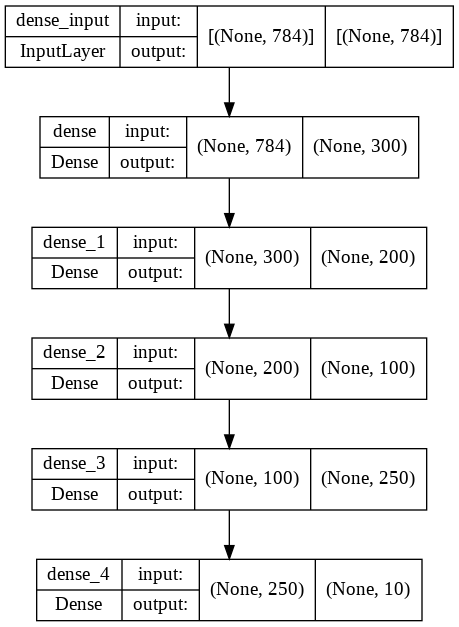

In [25]:
tf.keras.utils.plot_model(model2, to_file = 'model2.png', show_shapes=True)

In [26]:
model2.fit(x_train, ytrain, epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2169 - accuracy: 0.9342
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0993 - accuracy: 0.9697
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0703 - accuracy: 0.9789


In [27]:
model2.evaluate(x_test, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9718


[0.09001946449279785, 0.9718000292778015]

In [29]:
predict2 = model2.predict(x_test)

In [30]:
yhat2 = [np.argmax(i) for i in predict2]

<function matplotlib.pyplot.show>

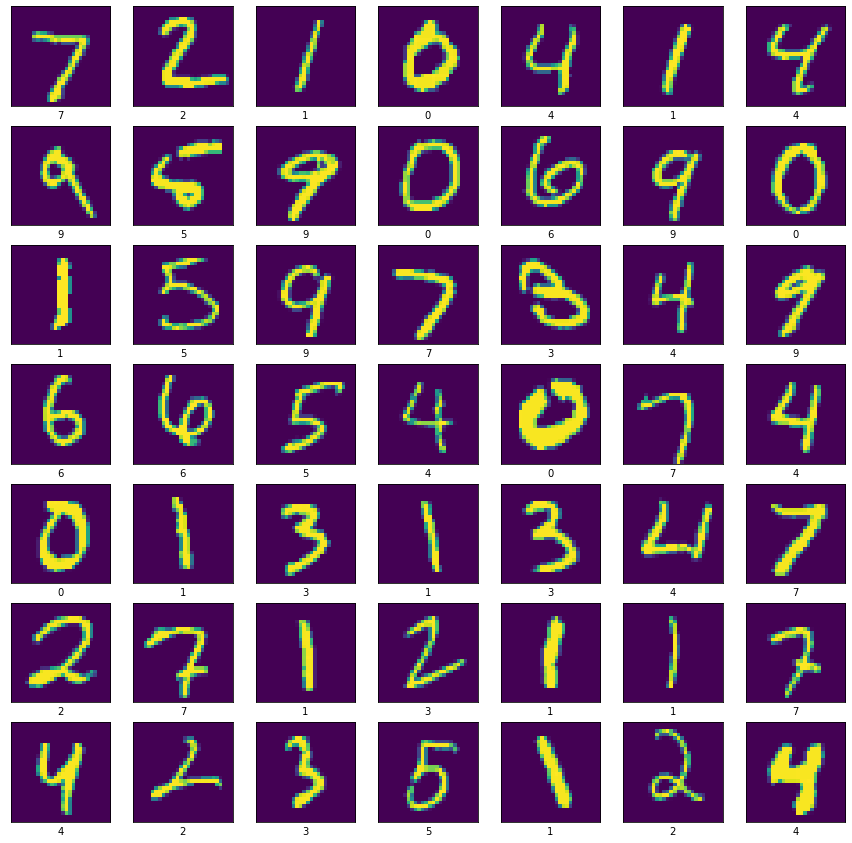

In [31]:
plt.figure(figsize=(15,15))

for i in range(49):
  plt.subplot(7,7,i+1)
  plt.imshow(xtest[i])
  plt.xlabel(classes[yhat2[i]])
  plt.xticks([])
  plt.yticks([])
plt.show

Text(0.5, 51.0, 'Prediction')

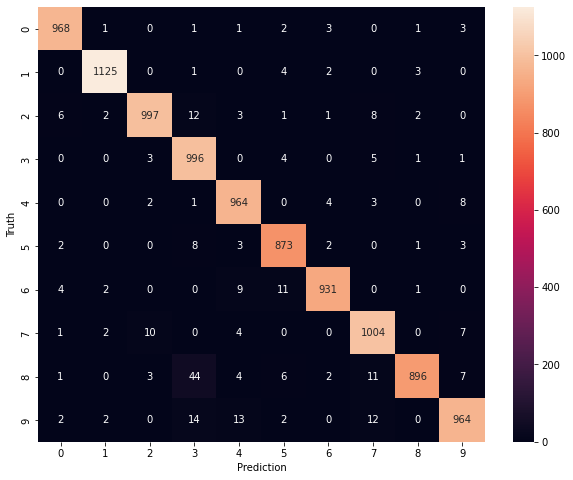

In [32]:
cm2 = tf.math.confusion_matrix(labels= ytest, predictions=yhat2)
plt.figure(figsize=(10,8))
sns.heatmap(cm2, annot=True, fmt='d')
plt.ylabel('Truth')
plt.xlabel('Prediction')